In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('dataMerge.csv')


In [3]:
df.isnull().sum().sum()

0

In [4]:
df["label"].value_counts()

,count
label,
1,4720
0,4720


In [5]:
df.head()

,text,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1
1,منتوج رائع وثمن مناسب ....جميل,1
2,كلنا ابن كيران لمتافق معايا يدير جيم,1
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1


In [6]:
#enregister les donnes
df.to_csv('dataMerge.csv', encoding='utf-8', index=False)

In [7]:
pip install nltk

# traitement de text et Tokenization

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download nltk resources
nltk.download('stopwords')
import re
from nltk.stem import SnowballStemmer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
emodf = pd.read_csv('emojis.csv')

emodf.head()

,emoji,text
0,🎃,جاك فانوس
1,🎄,شجرة عيد الميلاد
2,🎆,العاب ناريه
3,🎇,الماسة
4,🧨,مفرقعة نارية


In [10]:
def create_emoji_mapping(df):
    """
    Create a mapping dictionary from a DataFrame containing emojis and labels.

    Parameters:
    - df: DataFrame with 'Emoji' and 'Label' columns

    Returns:
    - Dictionary mapping emojis to labels
    """
    emoji_mapping = dict(zip(df['emoji'], df['text']))
    return emoji_mapping

def translate_emoji(text, emoji_mapping):
    """
    Replace emojis in a given text with their corresponding labels based on a mapping dictionary.

    Parameters:
    - text: Input text
    - emoji_mapping: Dictionary mapping emojis to labels

    Returns:
    - Text with emojis replaced by labels
    """
    for emoji_char, label in emoji_mapping.items():
        text = text.replace(emoji_char, ' '+label+' ')

    return text


def normalize_hashtags(text):
    """
     hashtags processing by removing hashtag and replacing underscore '_' by space ' ' in order to keep the words

    Parameters:
    - text: Input text

    Returns:
    - Cleaned text
    """
    hashtag_pattern = re.compile(r'#(\w+)')
    matches = hashtag_pattern.findall(text)
    for match in matches:
        original_hashtag = '#' + match
        transformed_text = match.replace('_', ' ')
        text = text.replace(original_hashtag, transformed_text)

    return text



def clean_text(text):
    """
     text processing steps version 1, including removing URLs, translating emojis,
     normalizing digits, keeping only Arabic characters, removing extra whitespaces,
     and cleaning up various Arabic text features.

    Parameters:
    - text: Input text

    Returns:
    - Cleaned text
    """

    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE) # remove URLs
    text = translate_emoji(text, emoji_mapping) # emojis to arabic ❤️ to قلب أحمر
 #   text = trans.normalize_digits(text, source='all', out='west') # Eastern/Persian numbers to Weastern numbers : ۰۱۲۳۴۵۶۷۸۹ ٠١٢٣٤٥٦٧٨٩ to 123456789
    text = normalize_hashtags(text) # في_المزيد# to في المزيد
    text = re.sub(r'\s?@\w+\s?', ' ', text) # remove tags like @user
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text) # keep only Arabic characters
    text = re.sub(r"(.)\1+", r"\1", text) #remove repeated chars : مممممملفففف to ملف
    text = ''.join([char for char in text if char not in ['،', '؛', '؟']]) # remove specific arabic punctuation marks like '،', '؛', '؟'
    text = re.sub(r"\s+", " ", text).strip() # remove extra whitespaces

    return text

In [11]:
emoji_mapping = create_emoji_mapping(emodf)


In [12]:
# add cleaned text column
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,text,label,cleaned_text
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...
1,منتوج رائع وثمن مناسب ....جميل,1,منتوج رائع وثمن مناسب جميل
2,كلنا ابن كيران لمتافق معايا يدير جيم,1,كلنا ابن كيران لمتافق معايا يدير جيم
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1,وفقك اله لولاية اخرى حقاش مكينش محسن منك
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...


In [13]:
arabic_stop_words = stopwords.words('arabic')


In [14]:
import numpy as np
np.array(arabic_stop_words).shape

(754,)

In [15]:
import nltk
nltk.download('punkt', download_dir='/content/nltk_data')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Exemple de données
corpus = df["text"]

# Création de l'objet TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ajustement et transformation des données
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Création d'un DataFrame pour visualiser la matrice TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Affichage de la matrice TF-IDF
print(df_tfidf)


       01   04  0630868018  0653056734  0684857098   07   08  0درهم   10  100  \
0     0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
1     0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
2     0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
3     0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
4     0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
...   ...  ...         ...         ...         ...  ...  ...    ...  ...  ...   
9435  0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
9436  0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
9437  0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
9438  0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   
9439  0.0  0.0         0.0         0.0         0.0  0.0  0.0    0.0  0.0  0.0   

      ...  ﻷنا  ﻷيام  ﻹعلام

In [17]:
import nltk
nltk.download('punkt_tab')
tokens = word_tokenize("text haha ")
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['text', 'haha']


In [18]:
stop_words = set(stopwords.words('arabic'))
all_stop_words = [item for item in stop_words if item not in ['لم', 'ه', 'لا','ن']]


In [19]:
df=pd.read_csv("dataMerge.csv")
df.head()

,text,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1
1,منتوج رائع وثمن مناسب ....جميل,1
2,كلنا ابن كيران لمتافق معايا يدير جيم,1
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1


In [20]:

# Fonction pour traiter le texte (supprimer les stopwords, normaliser la casse, etc.)
def process_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Suppression des stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming (facultatif - dépend de votre choix)
    stemmer = SnowballStemmer("arabic")
    words = [stemmer.stem(word) for word in words]

    # Reconstitution du texte
    processed_text = ' '.join(words)

    return processed_text

# Appliquer le prétraitement sur la colonne 'text' de votre DataFrame
df['processed_text'] = df['text'].apply(process_text)

In [21]:
df.head()

,text,label,processed_text
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1,طوال حيا المس اي تغير قدم حكوم فل نقف بجا بصو
1,منتوج رائع وثمن مناسب ....جميل,1,منتوج رايع وثم مناسب .... جميل
2,كلنا ابن كيران لمتافق معايا يدير جيم,1,كلن ابن كيرا متافق معا يدير
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1,وفق الله لولا اخرى حقاش مكينش محس منك
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1,لان بكل ساط رييس حكوم يعت معاق داخل بيت جعل ال...


<Axes: xlabel='label'>

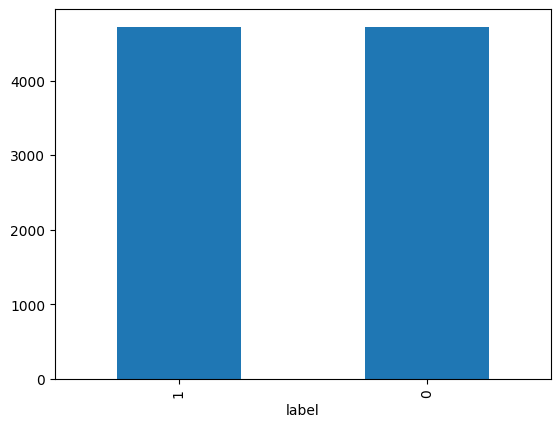

In [22]:
df['label'].value_counts().plot(kind='bar')

## Vectorisation avec TF-IDF et separation des donnes
Nous avons utilisé la technique TF-IDF (Term Frequency-Inverse Document Frequency) pour convertir nos textes en vecteurs numériques tout en préservant l'importance des mots. Cette transformation est cruciale pour l'entraînement de modèles de machine learning sur des données textuelles.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Vectorisation avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Vous pouvez ajuster le nombre maximal de fonctionnalités
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Afficher les fonctionnalités (mots) sélectionnées par TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Fonctionnalités sélectionnées par TF-IDF :", feature_names[:10])

# Afficher la matrice TF-IDF pour les données d'entraînement
print("Matrice TF-IDF pour les données d'entraînement :\n", X_train_tfidf.toarray())

Fonctionnalités sélectionnées par TF-IDF : ['0در' '10' '100' '1000' '11' '12' '15' '150' '17' '18']
Matrice TF-IDF pour les données d'entraînement :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Préparation des Données avec TF-IDF et Word Embeddings :
Nous avons préparé les données en utilisant deux techniques essentielles : TF-IDF pour la vectorisation du texte et Word Embeddings avec Keras. Voici comment nous avons effectué ces étapes :



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Étape 1: Vectorisation du Texte avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Vous pouvez ajuster le nombre maximal de fonctionnalités
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Étape 2: Division en ensembles d'entraînement et de test
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Étape 3: Word Embeddings avec Keras Tokenizer
tokenizer = Tokenizer(num_words=3000)  # Vous pouvez ajuster le nombre maximal de mots
tokenizer.fit_on_texts(df['text'])
X_seq = tokenizer.texts_to_sequences(df['text'])
X_pad = pad_sequences(X_seq)

# Étape 4: Division des séquences en ensembles d'entraînement et de test
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


# models
## Classification de Texte avec des Modèles Classiques
Dans cette section, nous explorons l'utilisation de modèles de classification classiques avec la bibliothèque Scikit-Learn. Les modèles tels que Support Vector Machine (SVM), Random Forest, et Régression Logistique sont entraînés et évalués sur des représentations TF-IDF des commentaires.

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle SVM
svm_model = SVC()

# Entraînement du modèle sur les représentations TF-IDF
svm_model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred_tfidf = svm_model.predict(X_test_tfidf)

# Évaluation du modèle
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_tfidf}")
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))


Accuracy (TF-IDF): 0.7473516949152542
Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       943
           1       0.76      0.72      0.74       945

    accuracy                           0.75      1888
   macro avg       0.75      0.75      0.75      1888
weighted avg       0.75      0.75      0.75      1888



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle RandomForestClassifier
randomForestClassifier = RandomForestClassifier()

# Entraînement du modèle sur les représentations TF-IDF
randomForestClassifier.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred_tfidf = randomForestClassifier.predict(X_test_tfidf)

# Évaluation du modèle
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_tfidf}")
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))


Accuracy (TF-IDF): 0.7341101694915254
Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       943
           1       0.74      0.71      0.73       945

    accuracy                           0.73      1888
   macro avg       0.73      0.73      0.73      1888
weighted avg       0.73      0.73      0.73      1888



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle LogisticRegression
logisticRegression = LogisticRegression()

# Entraînement du modèle sur les représentations TF-IDF
logisticRegression.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred_tfidf = logisticRegression.predict(X_test_tfidf)

# Évaluation du modèle
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_tfidf}")
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))


Accuracy (TF-IDF): 0.7484110169491526
Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       943
           1       0.77      0.71      0.74       945

    accuracy                           0.75      1888
   macro avg       0.75      0.75      0.75      1888
weighted avg       0.75      0.75      0.75      1888



In [29]:
pip install transformers torch


In [30]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch

# Définir un Dataset personnalisé pour la Darija
class DarijaDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Charger le modèle et le tokenizer BERT pour la Darija
model_name = "SI2M-Lab/DarijaBERT"  # Remplacez par un modèle spécifique à la Darija si disponible
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Ajustez num_labels pour votre tâche

# Préparer les données
texts = df['text'].tolist()  # Texte en Darija
labels = df['label'].tolist()  # Labels associés
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Créer les datasets
train_dataset = DarijaDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = DarijaDataset(X_test, y_test, tokenizer, max_length=128)

# Définir les paramètres d'entraînement
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Créer le Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Entraîner le modèle
trainer.train()

# Évaluer le modèle
trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/879k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.51M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


model.safetensors:   0%|          | 0.00/836M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SI2M-Lab/DarijaBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.454900,0.431293
2,0.402500,0.438471
3,0.067500,0.714140


{'eval_loss': 0.7141395211219788,
 'eval_runtime': 15.3557,
 'eval_samples_per_second': 122.951,
 'eval_steps_per_second': 1.954,
 'epoch': 3.0}

In [31]:
from sklearn.metrics import classification_report
y_pred = trainer.predict(test_dataset).predictions.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       943
           1       0.82      0.81      0.81       945

    accuracy                           0.81      1888
   macro avg       0.81      0.81      0.81      1888
weighted avg       0.81      0.81      0.81      1888



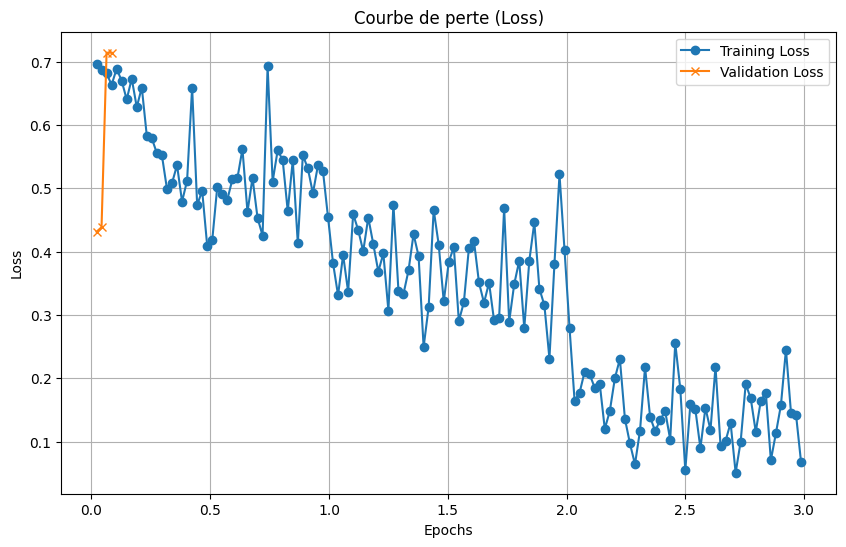

In [32]:
import matplotlib.pyplot as plt

# Récupérer les logs d'entraînement
training_logs = trainer.state.log_history

# Initialiser les listes pour stocker les valeurs
train_loss = []
eval_loss = []
epochs = []

# Extraire les données des logs
for log in training_logs:
    if 'loss' in log.keys() and 'epoch' in log.keys():
        train_loss.append(log['loss'])
        epochs.append(log['epoch'])
    if 'eval_loss' in log.keys():
        eval_loss.append(log['eval_loss'])

# Tracer la courbe de perte (Training Loss vs Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs[:len(eval_loss)], eval_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de perte (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import torch.nn as nn

# Personnaliser le modèle pour ajouter Dropout
class CustomBertForSequenceClassification(nn.Module):
    def __init__(self, model_name, num_labels, dropout_rate=0.3):
        super(CustomBertForSequenceClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout pour régularisation

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
            return_dict=True
        )
        # Appliquer Dropout sur les logits
        logits = self.dropout(outputs.logits)
        return {"logits": logits, "loss": outputs.loss}

# Dataset personnalisé pour la Darija
class DarijaDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Charger le modèle et tokenizer BERT pour la Darija
model_name = "SI2M-Lab/DarijaBERT"  # Remplacez par un modèle spécifique à la Darija si disponible
tokenizer = BertTokenizer.from_pretrained(model_name)
model = CustomBertForSequenceClassification(model_name, num_labels=2, dropout_rate=0.3)  # Dropout ajouté

# Préparer les données
texts = df['text'].tolist()  # Texte en Darija
labels = df['label'].tolist()  # Labels associés
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Créer les datasets
train_dataset = DarijaDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = DarijaDataset(X_test, y_test, tokenizer, max_length=128)

# Définir les paramètres d'entraînement
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,  # Régularisation L2
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_total_limit=2,  # Limiter le nombre de checkpoints
    save_steps=500  # Sauvegarder régulièrement
)

# Créer le Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Entraîner le modèle
trainer.train()

# Évaluer le modèle
results = trainer.evaluate()
print(results)


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SI2M-Lab/DarijaBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.470100,0.440517
2,0.341800,0.485665
3,0.109100,0.743768


{'eval_loss': 0.7437682747840881, 'eval_runtime': 15.4508, 'eval_samples_per_second': 122.194, 'eval_steps_per_second': 1.942, 'epoch': 3.0}


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()  # Prédictions
    labels = labels.numpy()  # Labels réels

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')  # Changez à 'macro' pour multiclasse
    recall = recall_score(labels, predictions, average='binary')
    f1 = f1_score(labels, predictions, average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [35]:
# Obtenir les prédictions sur l'ensemble de test
predictions = trainer.predict(test_dataset)

# Extraire les logits et les labels réels
logits = predictions.predictions
labels = predictions.label_ids

# Convertir les logits en prédictions finales
predicted_labels = torch.argmax(torch.tensor(logits), dim=-1).numpy()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcul des métriques
accuracy = accuracy_score(labels, predicted_labels)
precision = precision_score(labels, predicted_labels, average='binary')  # 'binary' pour classification binaire
recall = recall_score(labels, predicted_labels, average='binary')
f1 = f1_score(labels, predicted_labels, average='binary')

# Afficher les résultats
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

# Rapport détaillé
print("\nRapport de classification :")
print(classification_report(labels, predicted_labels))

Accuracy : 0.81
Precision : 0.83
Recall : 0.78
F1-Score : 0.80

Rapport de classification :
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       943
           1       0.83      0.78      0.80       945

    accuracy                           0.81      1888
   macro avg       0.81      0.81      0.81      1888
weighted avg       0.81      0.81      0.81      1888



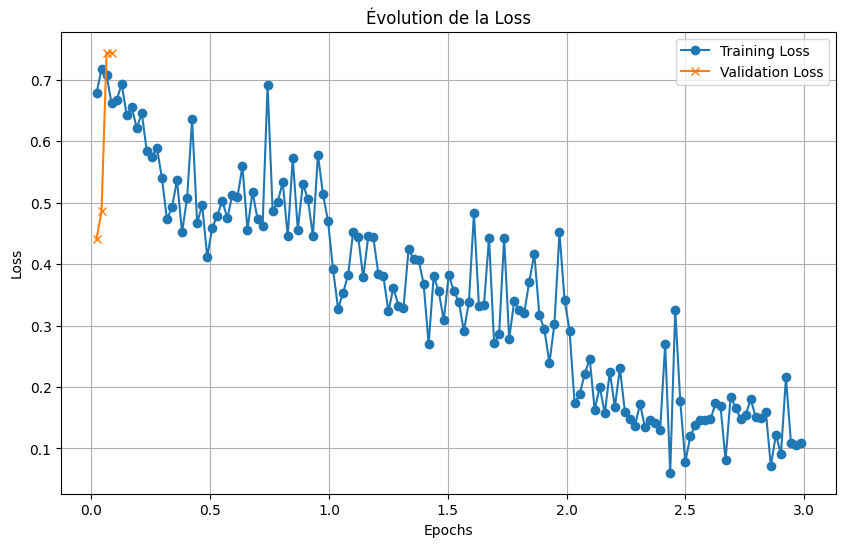

In [37]:
# Extraire les logs d'entraînement
training_logs = trainer.state.log_history

# Initialiser les listes
train_loss = []
eval_loss = []
epochs = []

# Parcourir les logs
for log in training_logs:
    if 'loss' in log and 'epoch' in log:
        train_loss.append(log['loss'])
        epochs.append(log['epoch'])
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs[:len(eval_loss)], eval_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Évolution de la Loss')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import torch.nn as nn

# Personnaliser le modèle pour ajouter Dropout
class CustomBertForSequenceClassification(nn.Module):
    def __init__(self, model_name, num_labels, dropout_rate=0.3):
        super(CustomBertForSequenceClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout pour régularisation

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
            return_dict=True
        )
        # Appliquer Dropout sur les logits
        logits = self.dropout(outputs.logits)
        return {"logits": logits, "loss": outputs.loss}

# Dataset personnalisé pour la Darija
class DarijaDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Charger le modèle et tokenizer BERT pour la Darija
model_name = "SI2M-Lab/DarijaBERT"  # Remplacez par un modèle spécifique à la Darija si disponible
tokenizer = BertTokenizer.from_pretrained(model_name)
model = CustomBertForSequenceClassification(model_name, num_labels=2, dropout_rate=0.3)  # Dropout ajouté

# Préparer les données
texts = df['text'].tolist()  # Texte en Darija
labels = df['label'].tolist()  # Labels associés
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Créer les datasets
train_dataset = DarijaDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = DarijaDataset(X_test, y_test, tokenizer, max_length=128)

# Définir les paramètres d'entraînement
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,  # Nombre maximal d'epochs (on utilise Early Stopping pour stopper avant)
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,  # Régularisation L2
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",  # Évaluer après chaque epoch
    save_strategy="epoch",  # Sauvegarder après chaque epoch
    save_total_limit=2,  # Limiter le nombre de checkpoints
    load_best_model_at_end=True  # Charger le meilleur modèle à la fin de l'entraînement
)

# Ajouter un callback pour Early Stopping
early_stopping = EarlyStoppingCallback(
    early_stopping_patience=1,  # Nombre d'epochs sans amélioration avant arrêt
    early_stopping_threshold=0.0  # Arrêter si aucune amélioration sur la Validation Loss
)

# Créer le Trainer avec Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping]  # Ajouter le callback Early Stopping
)

# Entraîner le modèle
trainer.train()

# Évaluer le modèle
results = trainer.evaluate()
print(results)


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SI2M-Lab/DarijaBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.470100,0.440517
2,0.363700,0.468121


{'eval_loss': 0.4405168890953064, 'eval_runtime': 14.8588, 'eval_samples_per_second': 127.063, 'eval_steps_per_second': 2.019, 'epoch': 2.0}


{'input_ids': tensor([    2,  1943,  2754,  3395,  3891,  2248,  2970, 18495,  2261,  2248,
          2339,  1110,     3,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [39]:
# Obtenir les prédictions sur l'ensemble de test
predictions = trainer.predict(test_dataset)

# Extraire les logits et les labels réels
logits = predictions.predictions
labels = predictions.label_ids

# Convertir les logits en prédictions finales
predicted_labels = torch.argmax(torch.tensor(logits), dim=-1).numpy()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcul des métriques
accuracy = accuracy_score(labels, predicted_labels)
precision = precision_score(labels, predicted_labels, average='binary')  # 'binary' pour classification binaire
recall = recall_score(labels, predicted_labels, average='binary')
f1 = f1_score(labels, predicted_labels, average='binary')

# Afficher les résultats
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

# Rapport détaillé
print("\nRapport de classification :")
print(classification_report(labels, predicted_labels))

Accuracy : 0.80
Precision : 0.81
Recall : 0.79
F1-Score : 0.80

Rapport de classification :
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       943
           1       0.81      0.79      0.80       945

    accuracy                           0.80      1888
   macro avg       0.80      0.80      0.80      1888
weighted avg       0.80      0.80      0.80      1888



In [51]:
import torch

# Déterminer l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Déplacer le modèle sur l'appareil
model.to(device)

# Phrase à tester
test_phrase = "هاذ المنتوج ماشي زوين"

# Tokenizer la phrase
inputs = tokenizer(
    test_phrase,
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors="pt"  # Retourne des tenseurs PyTorch
)

# Déplacer les inputs sur le même appareil que le modèle
inputs = {key: value.to(device) for key, value in inputs.items()}

# Passer la phrase dans le modèle
with torch.no_grad():
    outputs = model(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask']
    )

# Obtenir les prédictions (logits)
logits = outputs["logits"]
predicted_class = torch.argmax(logits, dim=-1).item()

# Afficher le résultat
print(f"Phrase : {test_phrase}")
print(f"Classe prédite : {predicted_class}")


Phrase :  زوين    
Classe prédite : 1


In [52]:
import torch

# Déterminer l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Déplacer le modèle sur l'appareil
model.to(device)

# Phrase à tester
test_phrase = "هذا المنتج ماشي رائع "

# Tokenizer la phrase
inputs = tokenizer(
    test_phrase,
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors="pt"  # Retourne des tenseurs PyTorch
)

# Déplacer les inputs sur le même appareil que le modèle
inputs = {key: value.to(device) for key, value in inputs.items()}

# Passer la phrase dans le modèle
with torch.no_grad():
    outputs = model(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask']
    )

# Obtenir les prédictions (logits)
logits = outputs["logits"]
predicted_class = torch.argmax(logits, dim=-1).item()

# Afficher le résultat
print(f"Phrase : {test_phrase}")
print(f"Classe prédite : {predicted_class}")


Phrase : هذا المنتج ماشي رائع 
Classe prédite : 1
